# Regressão

In [ ]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import numpy as np
sns.set_style('whitegrid')

In [ ]:
kjson = pd.read_json('kaggle.json',typ='series')

In [ ]:
os.environ['KAGGLE_USERNAME']= "matheuscoradini"
os.environ['KAGGLE_KEY']= kjson.key

In [ ]:
!kaggle datasets download --force lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 64.0MB/s]


In [ ]:
!unzip google-play-store-apps.zip

Archive:  google-play-store-apps.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('googleplaystore.csv')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# DataFrame Auxiliar

aux = pd.DataFrame({'colunas': df.columns, 'tipo': df.dtypes, 'missing': df.isna().sum(), 'size':df.shape[0], 'unicos': df.nunique()})
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
App,App,object,0,10841,9660,0.00
Category,Category,object,0,10841,34,0.00
Rating,Rating,float64,1474,10841,40,0.14
Reviews,Reviews,object,0,10841,6002,0.00
Size,Size,object,0,10841,462,0.00
Installs,Installs,object,0,10841,22,0.00
Type,Type,object,1,10841,3,0.00
Price,Price,object,0,10841,93,0.00
Content Rating,Content Rating,object,1,10841,6,0.00
Genres,Genres,object,0,10841,120,0.00


In [ ]:
df.drop(['App','Current Ver'], 1, inplace=True)

In [ ]:
df.dropna(inplace=True)

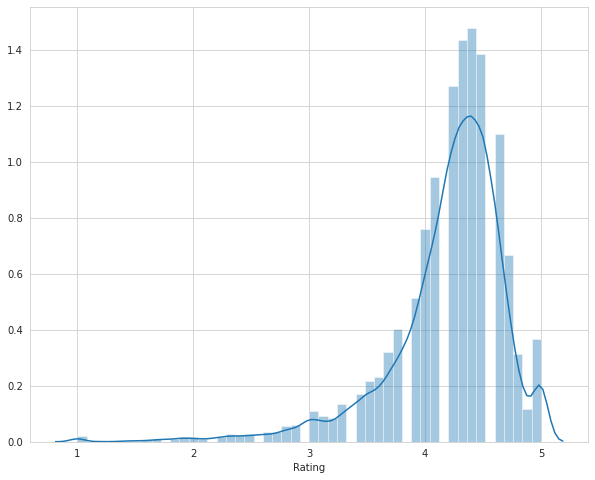

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df.Rating, bins = 50)
plt.show()

# Size

In [ ]:
df['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    159
15M                    159
                      ... 
55k                      1
899k                     1
511k                     1
39k                      1
801k                     1
Name: Size, Length: 414, dtype: int64

In [ ]:
df['Size'].apply(lambda x: x[-1]).value_counts()

M    7469
e    1637
k     258
Name: Size, dtype: int64

In [ ]:
df.loc[df['Size'].apply(lambda x: x[-1]) == 'e', 'Size']

37       Varies with device
42       Varies with device
52       Varies with device
67       Varies with device
68       Varies with device
                ...        
10713    Varies with device
10725    Varies with device
10765    Varies with device
10826    Varies with device
10839    Varies with device
Name: Size, Length: 1637, dtype: object

In [ ]:
# Transformar em NaNs para conseguir tratar os dados restantes da melhor maneira

df.loc[df['Size'].apply(lambda x: x[-1]) == 'e', 'Size'] = np.nan

In [ ]:
def transform_size(x):
  x = str(x).replace('.', '')

  if str(x)[-1] == 'M':
    return int(x[:-1] + '1000')
  elif str(x)[-1] == 'k':
    return int(x[:-1] + '1000000')

df['Size'] = df['Size'].apply(transform_size)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
df['Size'] = imputer.fit_transform(np.array(df['Size']).reshape(-1,1))

In [ ]:
df['Size'].isnull().sum()

0

# Reviews

In [ ]:
def transform_size(x):
  x = str(x).replace('.', '')

  if str(x)[-1] == 'M':
    return int(x[:-1] + '1000')
  elif str(x)[-1] == 'k':
    return int(x[:-1] + '1000000')
  else:
    return int(x)

In [ ]:
df['Reviews'] = df['Reviews'].apply(transform_size)

In [ ]:
df['Reviews'] = df['Reviews'].astype('int64')

# Installs

In [ ]:
df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [ ]:
def transform_installs(x):
  x = str(x).replace(',', '')
  x = str(x[:-1])

  return int(x)

df['Installs'] = df['Installs'].apply(transform_installs)

# Last Update

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9364, dtype: datetime64[ns]

In [ ]:
df['Last Updated'] = (df['Last Updated'] - df['Last Updated'].max()).dt.days
df['Last Updated']

0        -213
1        -205
2          -7
3         -61
4         -49
         ... 
10834    -416
10836    -379
10837     -33
10839   -1297
10840     -14
Name: Last Updated, Length: 9364, dtype: int64

# Genre

In [ ]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
df['Genres'].apply(lambda x: x.split(';')[0]).value_counts()

Tools                      734
Entertainment              577
Education                  563
Action                     375
Productivity               351
Medical                    350
Sports                     337
Communication              329
Finance                    323
Photography                317
Lifestyle                  315
Personalization            312
Business                   303
Health & Fitness           299
Casual                     262
Social                     259
Shopping                   238
News & Magazines           233
Travel & Local             226
Arcade                     223
Simulation                 212
Dating                     195
Books & Reference          180
Video Players & Editors    163
Puzzle                     148
Maps & Navigation          124
Role Playing               119
Racing                     114
Food & Drink               109
Strategy                   107
Educational                103
Adventure                   89
House & 

In [ ]:
df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])

df.loc[df['Genres'] == 'Music & Audio', 'Genres'] = 'Music'

# Price

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
def transform_price(x):
  x = str(x).replace('$','')
  return float(x)

df['Price'] = df['Price'].apply(transform_price)
df['Price'] = df['Price'].astype('float64')

# Feature Engineering

In [ ]:
df['Free'] = 0
df.loc[df['Price'] == 0, 'Free'] = 1

In [ ]:
df['Free'].value_counts()

1    8718
0     646
Name: Free, dtype: int64

In [ ]:
aux = pd.DataFrame({'colunas': df.columns, 'tipo': df.dtypes, 'missing': df.isna().sum(), 'size':df.shape[0], 'unicos': df.nunique()})
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
Category,Category,object,0,9364,33,0.0
Rating,Rating,float64,0,9364,39,0.0
Reviews,Reviews,int64,0,9364,5992,0.0
Size,Size,float64,0,9364,323,0.0
Installs,Installs,int64,0,9364,19,0.0
Type,Type,object,0,9364,2,0.0
Price,Price,float64,0,9364,73,0.0
Content Rating,Content Rating,object,0,9364,6,0.0
Genres,Genres,object,0,9364,47,0.0
Last Updated,Last Updated,int64,0,9364,1300,0.0


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Last Updated,Free
Rating,1.000000,0.068161,-0.037950,0.051377,-0.021901,0.142754,-0.039470
Reviews,0.068161,1.000000,-0.012689,0.641610,-0.009820,0.088155,0.043262
Size,-0.037950,-0.012689,1.000000,-0.012048,0.024914,-0.258434,-0.052258
Installs,0.051377,0.641610,-0.012048,1.000000,-0.011891,0.104338,0.053070
Price,-0.021901,-0.009820,0.024914,-0.011891,1.000000,-0.003930,-0.223187
Last Updated,0.142754,0.088155,-0.258434,0.104338,-0.003930,1.000000,0.177770
Free,-0.039470,0.043262,-0.052258,0.053070,-0.223187,0.177770,1.000000


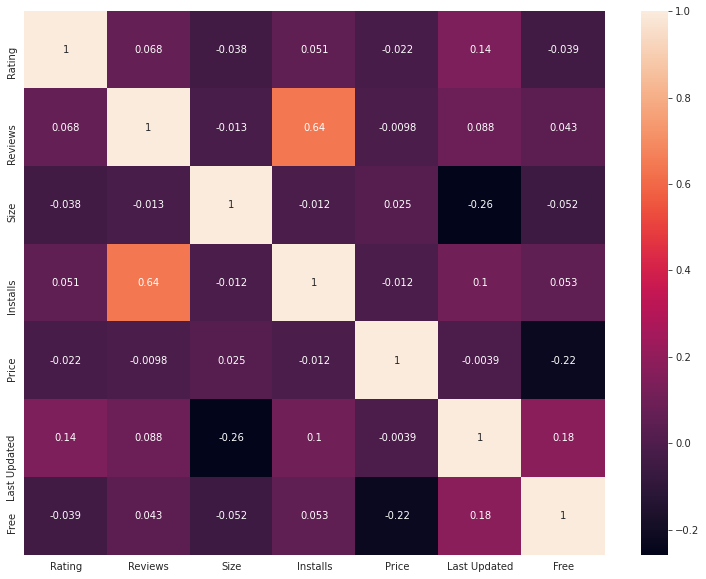

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True)

# One Hot Encoding

In [ ]:
df= pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape

(9364, 121)

# Split

In [ ]:
X = df.drop('Rating',1)
y = df['Rating']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colunas = Xtrain.columns

Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain))
Xtrain.columns = colunas

Xval = pd.DataFrame(scaler.transform(Xval))
Xval.columns = colunas

# Models

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

svr.fit(Xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred = svr.predict(Xval)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [ ]:
def rmse(ytrue, ypred):
  return np.sqrt(mse(ytrue, ypred))

In [ ]:
print(mae(yval, pred))
print(mse(yval, pred))
print(rmse(yval, pred))
print(r2(yval, pred))

0.3397197647047635
0.2612022267312408
0.5110794720307604
0.04589204394261803


In [ ]:
def plot_result(yval, pred):
  compare = pd.DataFrame()
  compare['pred'] = pred
  compare['yval'] = yval

  plt.scatter(x=compare['yval'], y=compare['pred'])

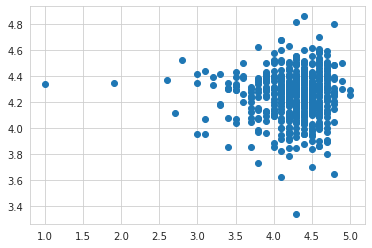

In [ ]:
plot_result(yval,pred)

# Cross Val

### https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_validate

Xscaled = scaler.fit_transform(X)

cross_val = cross_validate(svr, X, y, cv=5, scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
cross_validate(rf, Xscaled, y, cv=5, scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))

{'fit_time': array([7.63826752, 7.81552815, 7.73863196, 7.62028742, 7.60030603]),
 'score_time': array([0.04916906, 0.0505538 , 0.05311728, 0.05216193, 0.0539217 ]),
 'test_neg_mean_absolute_error': array([-0.23480619, -0.22982648, -0.32503791, -0.40682381, -0.38713218]),
 'test_neg_mean_squared_error': array([-0.1227035 , -0.11436565, -0.24481193, -0.36289783, -0.31443476]),
 'test_r2': array([0.10435102, 0.00155254, 0.18089175, 0.10275632, 0.08619734])}

In [ ]:
rf.fit(Xtrain, ytrain)
pred=rf.predict(Xval)

In [ ]:
print(mae(yval, pred))
print(mse(yval, pred))
print(rmse(yval, pred))
print(r2(yval, pred))

0.3037136052968816
0.21957834449060226
0.46859187411926195
0.1979339223935681


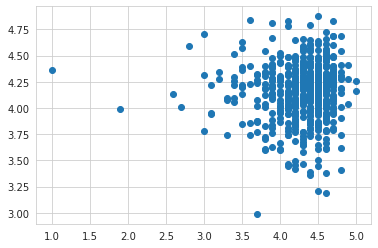

In [ ]:
plot_result(yval,pred)

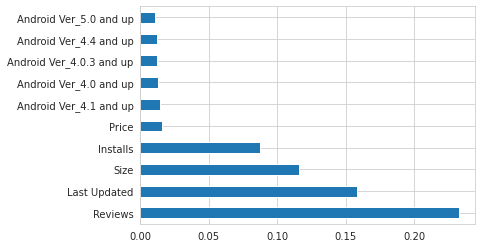

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42)
rs.fit(Xscaled, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 26.1min finished


CPU times: user 27min 18s, sys: 2.23 s, total: 27min 20s
Wall time: 27min 36s


In [ ]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
rf_rs = RandomForestRegressor(bootstrap=True, max_depth=100,
                              max_features='auto', min_samples_leaf=4, min_samples_split=2, n_estimators=1200)
rf_rs.fit(Xtrain, ytrain)

pred = rf_rs.predict(Xval)

In [ ]:
print(mae(yval, pred))
print(mse(yval, pred))
print(rmse(yval, pred))
print(r2(yval, pred))

0.31220122907597647
0.21865960097341594
0.4676105227359794
0.20128986813068295


# Classificação - Fraude de Cartão de Crédito

In [ ]:
!kaggle datasets download --force mlg-ulb/creditcardfraud

 62% 41.0M/66.0M [00:00<00:00, 38.8MB/s]
100% 66.0M/66.0M [00:00<00:00, 90.3MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# DataFrame Auxiliar

aux = pd.DataFrame({'colunas': df.columns, 'tipo': df.dtypes, 'missing': df.isna().sum(), 'size':df.shape[0], 'unicos': df.nunique()})
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
Time,Time,float64,0,284807,124592,0.0
V1,V1,float64,0,284807,275663,0.0
V2,V2,float64,0,284807,275663,0.0
V3,V3,float64,0,284807,275663,0.0
V4,V4,float64,0,284807,275663,0.0
V5,V5,float64,0,284807,275663,0.0
V6,V6,float64,0,284807,275663,0.0
V7,V7,float64,0,284807,275663,0.0
V8,V8,float64,0,284807,275663,0.0
V9,V9,float64,0,284807,275663,0.0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Split e Scaler

In [ ]:
X = df.drop('Class',1)
y = df['Class']


from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain))
Xval = pd.DataFrame(scaler.transform(Xval))

In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(Xtrain, ytrain)

pred = svc.predict(Xval)

In [ ]:
# Accuracy

svc.score(Xval, yval)

0.9993722536095417

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, pred)

array([[93805,    33],
       [   26,   123]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yval, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.79      0.83      0.81       149

    accuracy                           1.00     93987
   macro avg       0.89      0.91      0.90     93987
weighted avg       1.00      1.00      1.00     93987



# Imblearn

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html

In [ ]:
%%time
from imblearn.combine import SMOTETomek
sm = SMOTETomek(sampling_strategy=0.75)
Xres, yres = sm.fit_resample(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 3min 14s, sys: 66 ms, total: 3min 14s
Wall time: 3min 15s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(yres).value_counts()

0    190477
1    142857
dtype: int64

In [ ]:
%%time
from sklearn.svm import SVC
svc = SVC(probability=True)

svc.fit(Xres, yres)

pred = svc.predict(Xval)

In [ ]:
confusion_matrix(yval, pred)

In [ ]:
print(classification_report(yval, pred))

In [ ]:
prob = svc.predict_proba(Xval)

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(yval, prob, figsize=(8,8), curves='each_class')

In [ ]:
0 - 0.5 -> 1